In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms')
from src.utils.vss_helper_functions import model_prediction_on_triplets
import pandas as pd
#import library to do mds
from sklearn.manifold import MDS

# v1

## evaluting models and comparing to human performance

In [2]:
# load human triplet data
human_triplets = pd.read_csv('../../../data/vss_2023/mturk_results_processed.csv')
df_ce_pt_ideal = pd.read_csv('../../../data/cogsci_2023/model_activations_pre_final/baseline_ce_pt_ideal.csv', index_col=0)
df_ce_pt_overfit = pd.read_csv('../../../data/cogsci_2023/model_activations_pre_final/baseline_ce_pt_overfit.csv', index_col=0)
df_bce_v2_ideal = pd.read_csv('../../../data/cogsci_2023/model_activations_pre_final/bce_v2_ideal.csv', index_col=0)
df_bce_v2_overfit = pd.read_csv('../../../data/cogsci_2023/model_activations_pre_final/bce_v2_overfit.csv', index_col=0)
df_ce_scratch = pd.read_csv('../../../data/cogsci_2023/model_activations_pre_final/baseline_ce_scratch.csv', index_col=0)
leuven = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/pre-final-layer-embeddings/ground_truth_leuven_norms.csv', index_col=0)

In [4]:
baseline_ce_pt_ideal_performance = model_prediction_on_triplets(human_triplets, df_ce_pt_ideal)
baseline_ce_pt_overfit_performance = model_prediction_on_triplets(human_triplets, df_ce_pt_overfit)
baseline_ce_scratch_performance = model_prediction_on_triplets(human_triplets, df_ce_scratch)
bce_ideal_performance = model_prediction_on_triplets(human_triplets, df_bce_v2_ideal)
bce_overfit_performance = model_prediction_on_triplets(human_triplets, df_bce_v2_overfit)
leuven_performance = model_prediction_on_triplets(human_triplets, leuven)
# #save results
# baseline_ce_performance.to_csv('../../../data/vss_2023/baseline_ce_performance.csv')
# bce_performance.to_csv('../../../data/vss_2023/bce_performance.csv')
# mse_performance.to_csv('../../../data/vss_2023/mse_performance.csv')
# bce_v2_performance.to_csv('../../../data/vss_2023/bce_v2_performance.csv')


/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['winner'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['correct'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:140: SettingWithCopyWarning: 
A value is trying to b

In [5]:
#chose columns triplet_category and correct, groupby triplet_category and get mean 'correct' for each triplet_category

baseline_pt_ideal_cat_accuracy = baseline_ce_pt_ideal_performance.groupby('triplet_category')['correct'].mean()
baseline_pt_overfit_cat_accuracy = baseline_ce_pt_overfit_performance.groupby('triplet_category')['correct'].mean()
baseline_scratch_cat_accuracy = baseline_ce_scratch_performance.groupby('triplet_category')['correct'].mean()
bce_ideal_cat_accuracy = bce_ideal_performance.groupby('triplet_category')['correct'].mean()
bce_overfit_cat_accuracy = bce_overfit_performance.groupby('triplet_category')['correct'].mean()
human_cat_accuracy = human_triplets.groupby('triplet_category')['accuracy'].mean()
leuven_cat_accuracy = leuven_performance.groupby('triplet_category')['correct'].mean()

# put the accuracies in a dataframe
cat_accuracy = pd.DataFrame({'baseline_ce_pt_ideal': baseline_pt_ideal_cat_accuracy,'baseline_ce_pt_overfit': baseline_pt_overfit_cat_accuracy, 'baseline_ce_scratch': baseline_scratch_cat_accuracy, 'bce_ideal': bce_ideal_cat_accuracy, 'bce_overfit': bce_overfit_cat_accuracy, 'human': human_cat_accuracy,'leuven': leuven_cat_accuracy})

# make a new row and add the mean accuracy of all the columns
cat_accuracy.loc['mean'] = cat_accuracy.mean()


In [6]:
# replace cat_0 with 'CC'
# replace cat_1 with 'CD'
# replace cat_2 with 'CO'
# replace cat_3 with 'DD
# replace cat_4 with 'DO'

cat_accuracy.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']

# add a new column called 'note' and add the following text to each row:
# cc - both from the same category as the head
# cd - one from the same category and one from a different category in the same domain
# co - one from the same category and one from a different domain all together
# dd - both from a different category in the same domain
# do - one from a different category in the same domain and one from a different domain all together
cat_accuracy['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']




cat_accuracy


,baseline_ce_pt_ideal,baseline_ce_pt_overfit,baseline_ce_scratch,bce_ideal,bce_overfit,human,leuven,note
CC,0.466667,0.400000,0.566667,0.500000,0.366667,0.726300,0.700000,both from the same category as the head
CD,0.400000,0.433333,0.400000,0.500000,0.600000,0.906606,1.000000,one from the same category and one from a diff...
CO,0.533333,0.700000,0.500000,0.566667,0.600000,0.976819,1.000000,one from the same category and one from a diff...
DD,0.416667,0.450000,0.583333,0.616667,0.450000,0.742177,0.716667,both from a different category in the same domain
DO,0.366667,0.633333,0.466667,0.566667,0.600000,0.890609,0.966667,one from a different category in the same doma...
mean,0.436667,0.523333,0.503333,0.550000,0.523333,0.848502,0.876667,


In [9]:
# display all columns except for 'human'

cat_accuracy[['baseline_ce_pt_ideal', 'baseline_ce_pt_overfit', 'baseline_ce_scratch', 'bce_ideal', 'bce_overfit', 'leuven']]

,baseline_ce_pt_ideal,baseline_ce_pt_overfit,baseline_ce_scratch,bce_ideal,bce_overfit,leuven
CC,0.466667,0.400000,0.566667,0.500000,0.366667,0.700000
CD,0.400000,0.433333,0.400000,0.500000,0.600000,1.000000
CO,0.533333,0.700000,0.500000,0.566667,0.600000,1.000000
DD,0.416667,0.450000,0.583333,0.616667,0.450000,0.716667
DO,0.366667,0.633333,0.466667,0.566667,0.600000,0.966667
mean,0.436667,0.523333,0.503333,0.550000,0.523333,0.876667


In [ ]:
cat_accuracy.to_csv('../../../results/vss_2023/performance_of_models_on_triplets.csv')

## hierarchical cluster plot

In [10]:
# plot hierarchical cluster plot showing the cosine similarity between the embeddings of the different classes
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import leaves_list
from scipy.cluster.hierarchy import maxdists
from scipy.cluster.hierarchy import maxinconsts
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import to_tree
from scipy.cluster.hierarchy import ward, single, complete, average, weighted, centroid, median, ward, dendrogram

In [30]:
def create_and_save_dendogram(df, title):
     # calculate the distance matrix
    distance_matrix = pdist(df, metric='cosine')
    # calculate the linkage matrix
    linkage_matrix = linkage(distance_matrix, method='ward')
    # calculate the cophenetic correlation coefficient
    c, coph_dists = cophenet(linkage_matrix, distance_matrix)
    # calculate the full dendrogram
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        linkage_matrix,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=11.,
        labels = df.index  # font size for the x axis labels
    )
    # plt.show()
    #save dendrogram
    plt.savefig('../../../results/cogsci/dendrogram_{}.png'.format(title))


In [33]:
# in leuven chose the rows that are prsent in df_ce_pt_ideal
leuven = leuven.loc[leuven.index.isin(df_ce_pt_ideal.index)]
leuven

,builds_nests_at_high_altitude,"can_be_brown,_black,_white,_grey",can_be_fed,can_be_lethal_to_man,can_be_taught_tricks,can_eat_people,can_live_for_a_long_time_without_food,can_open_its_tail,carries_a_ring,children_like_to_catch_them,...,you_play_rhythms_on_it,you_put_butter_in_it,you_put_oil_in_it,you_ride_it_on_the_cycle_path,you_roast_meat_in_it,you_use_it_when_bricklaying,you_wear_it_in_your_shoes,you_wear_it_with_a_tie,you're_sitting_higher_in_it_than_in_a_car,you're_standing_with_1_leg_on_the_board
monkey,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kangaroo,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lion,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elephant,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
whale,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cockroach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beetle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
moth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
caterpillar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spider,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


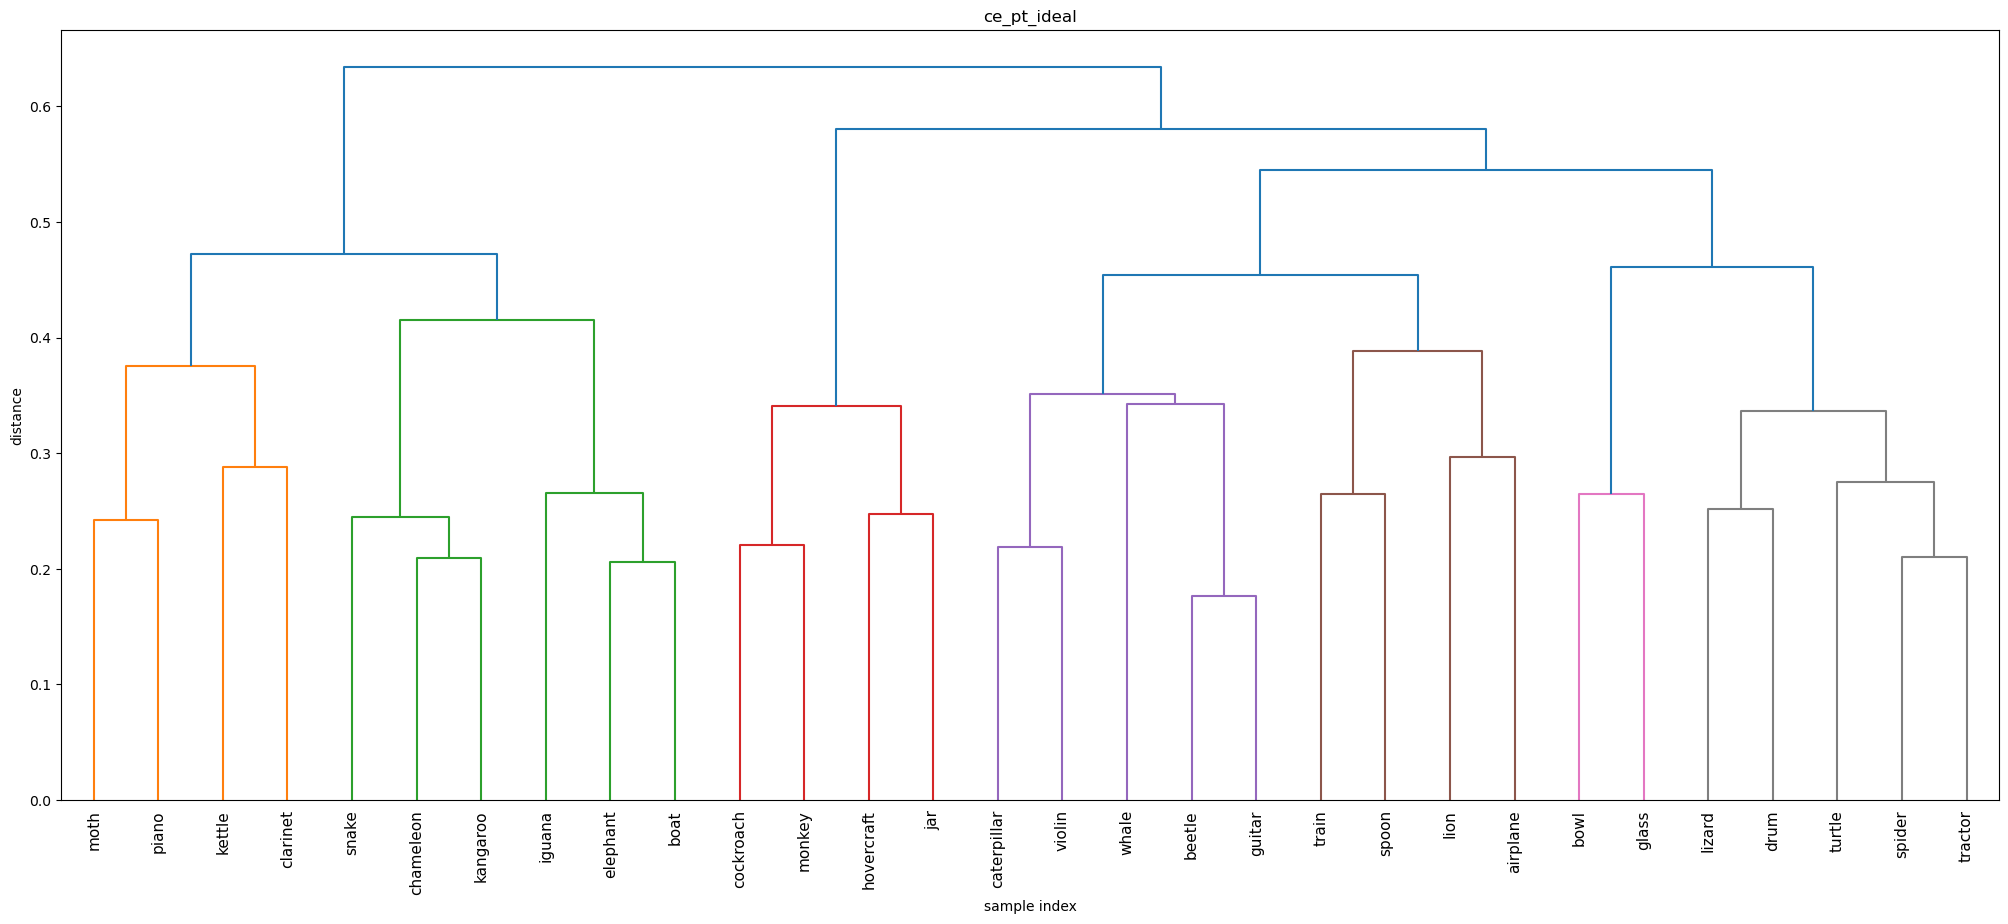

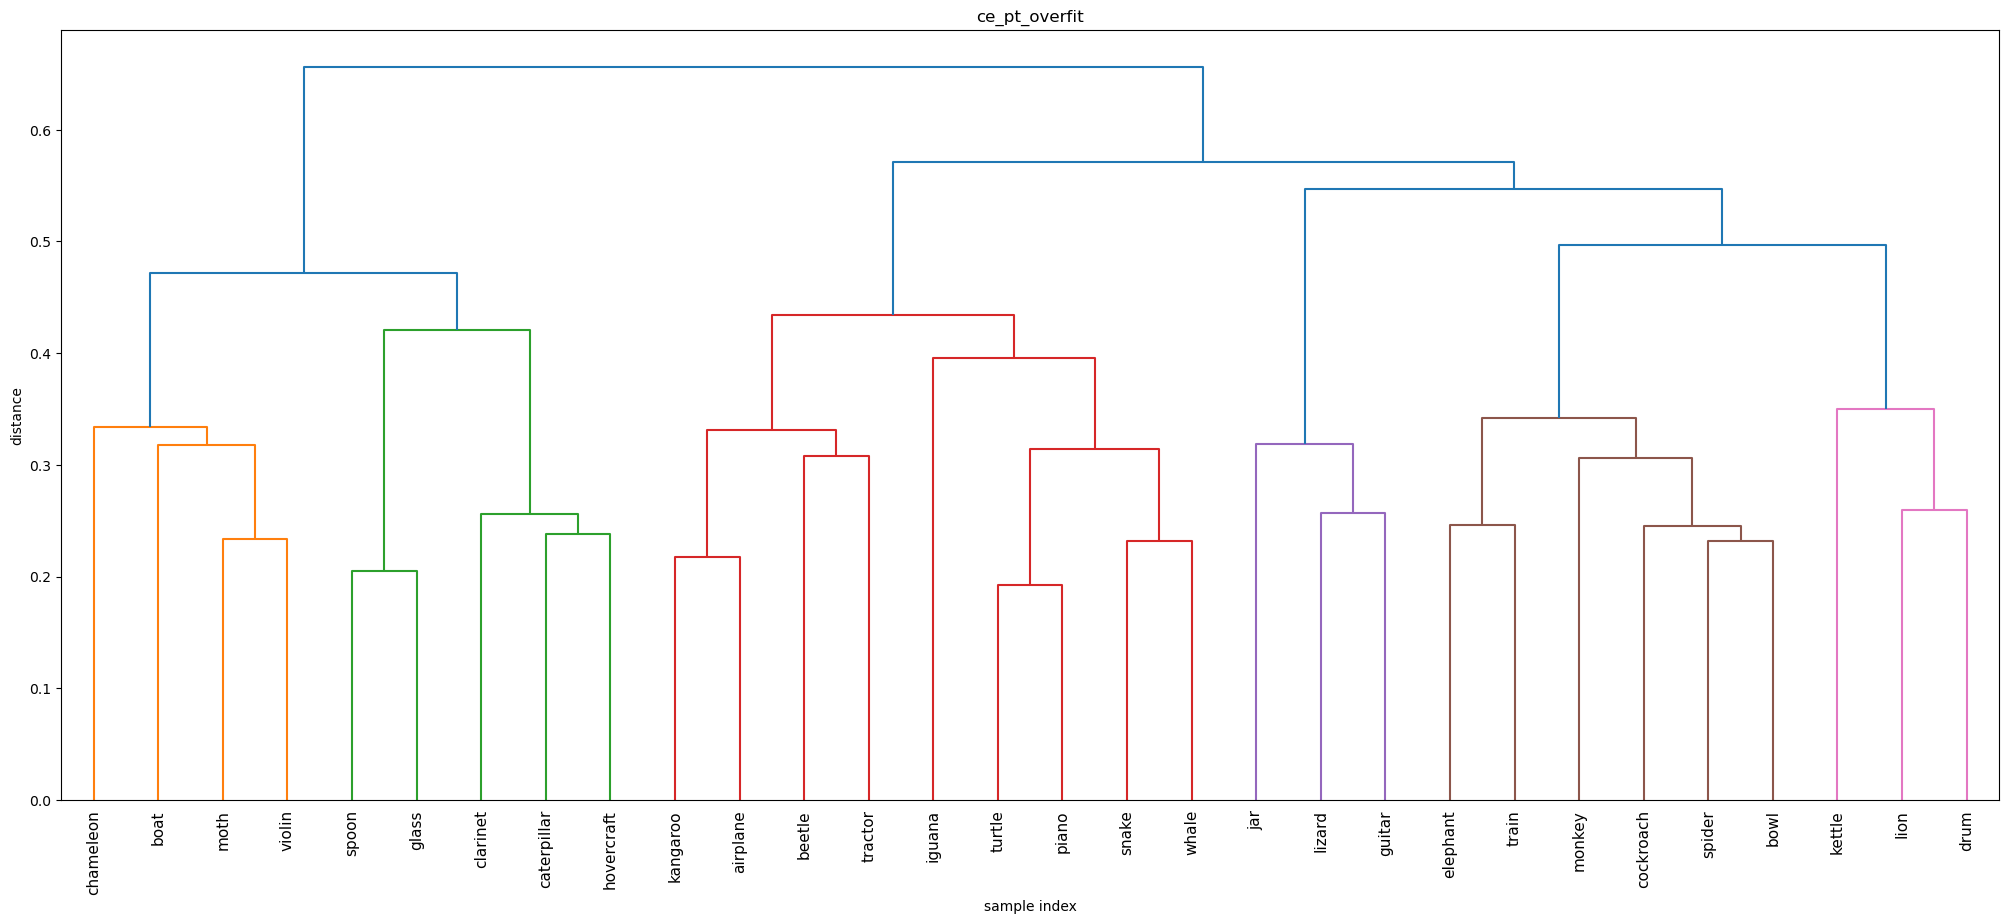

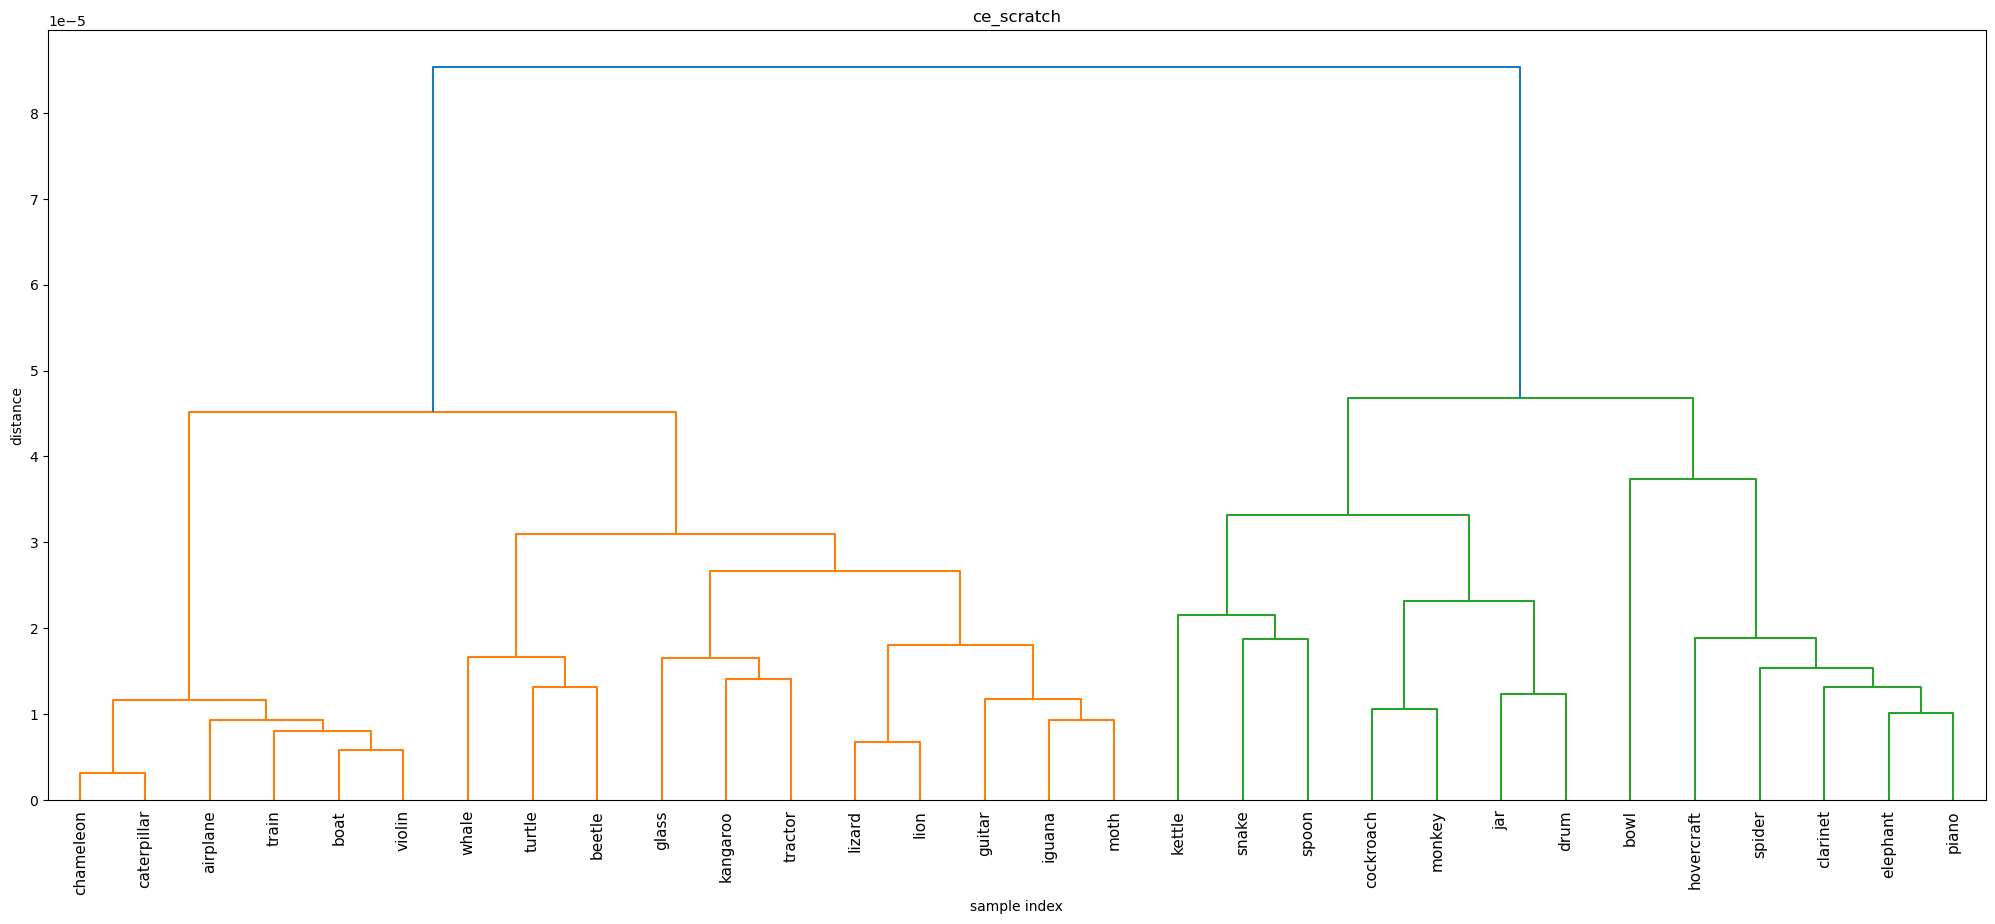

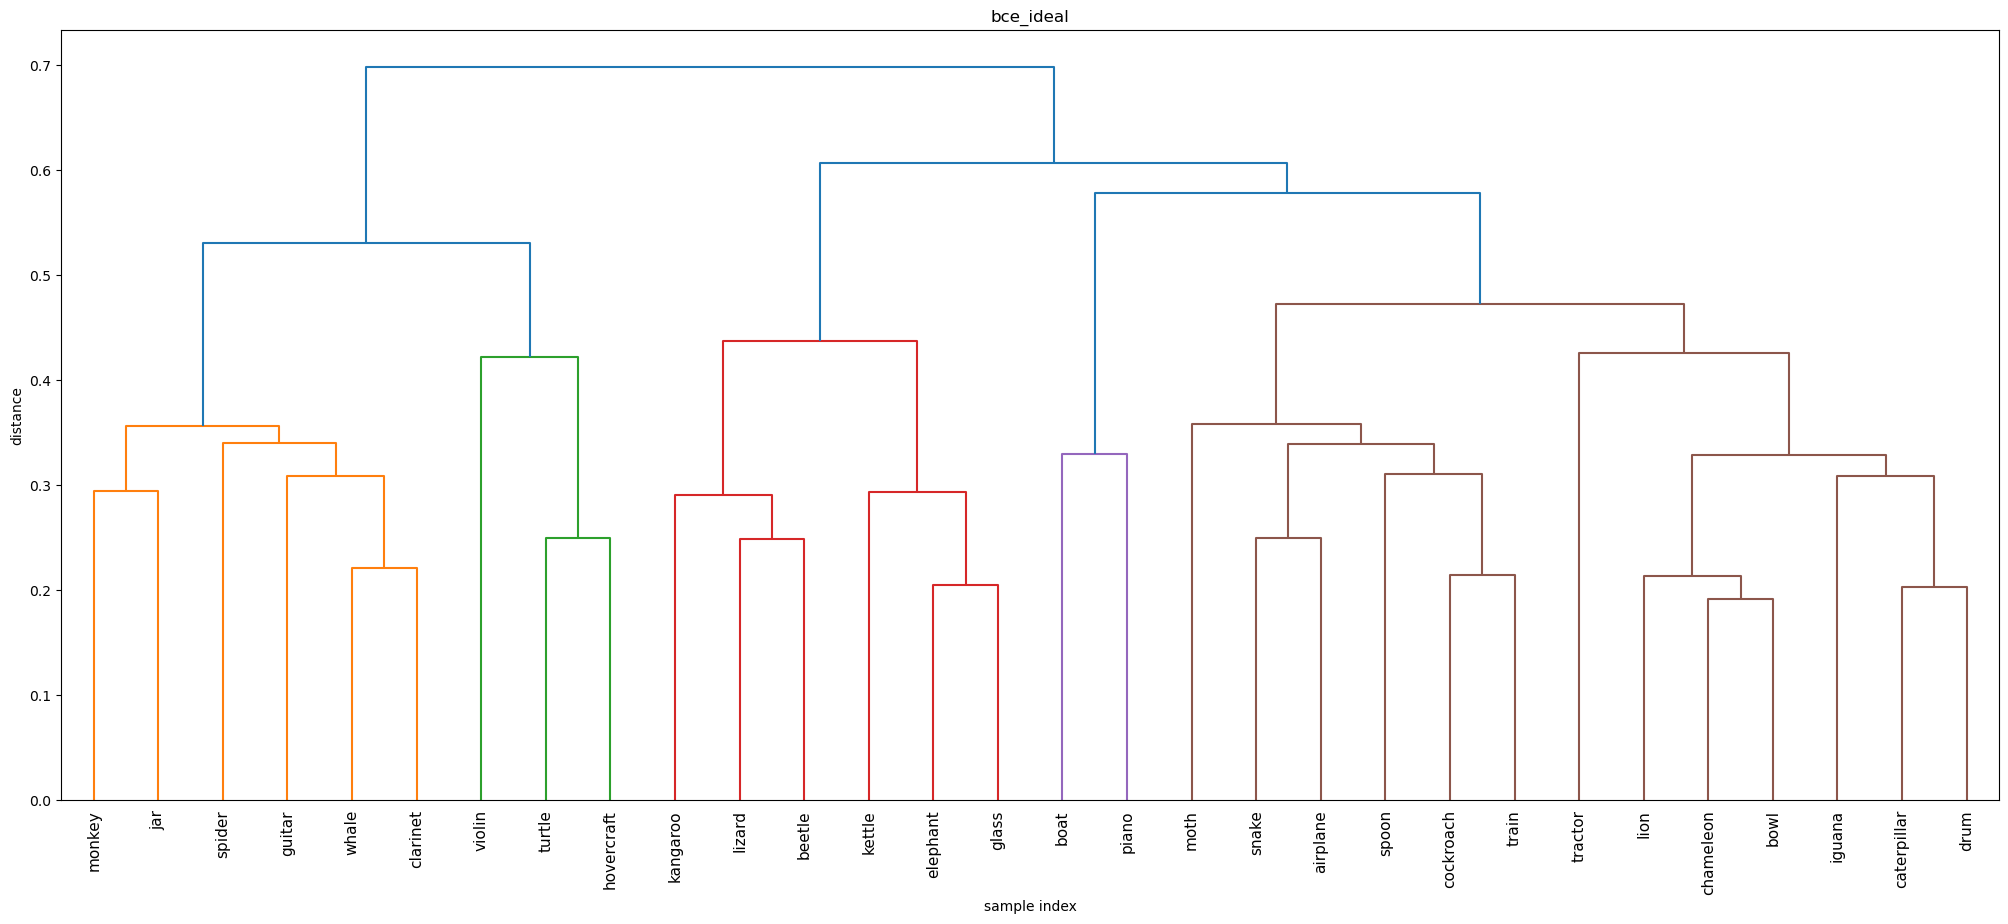

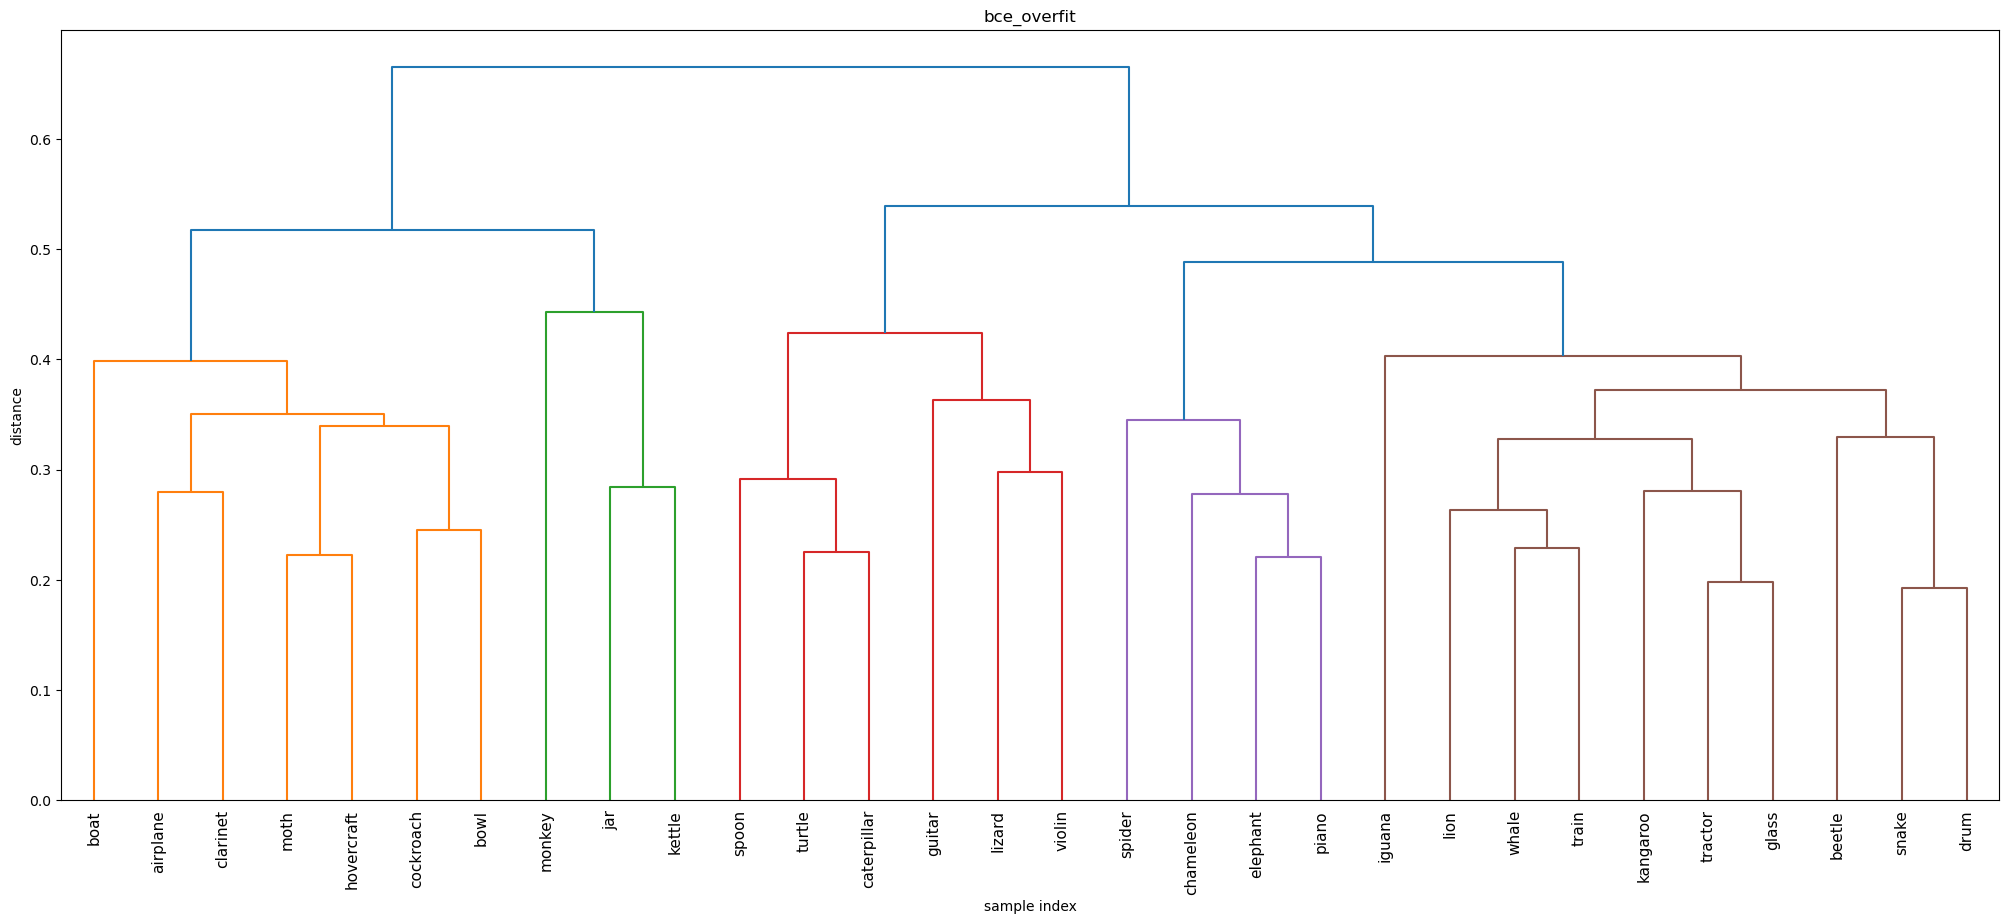

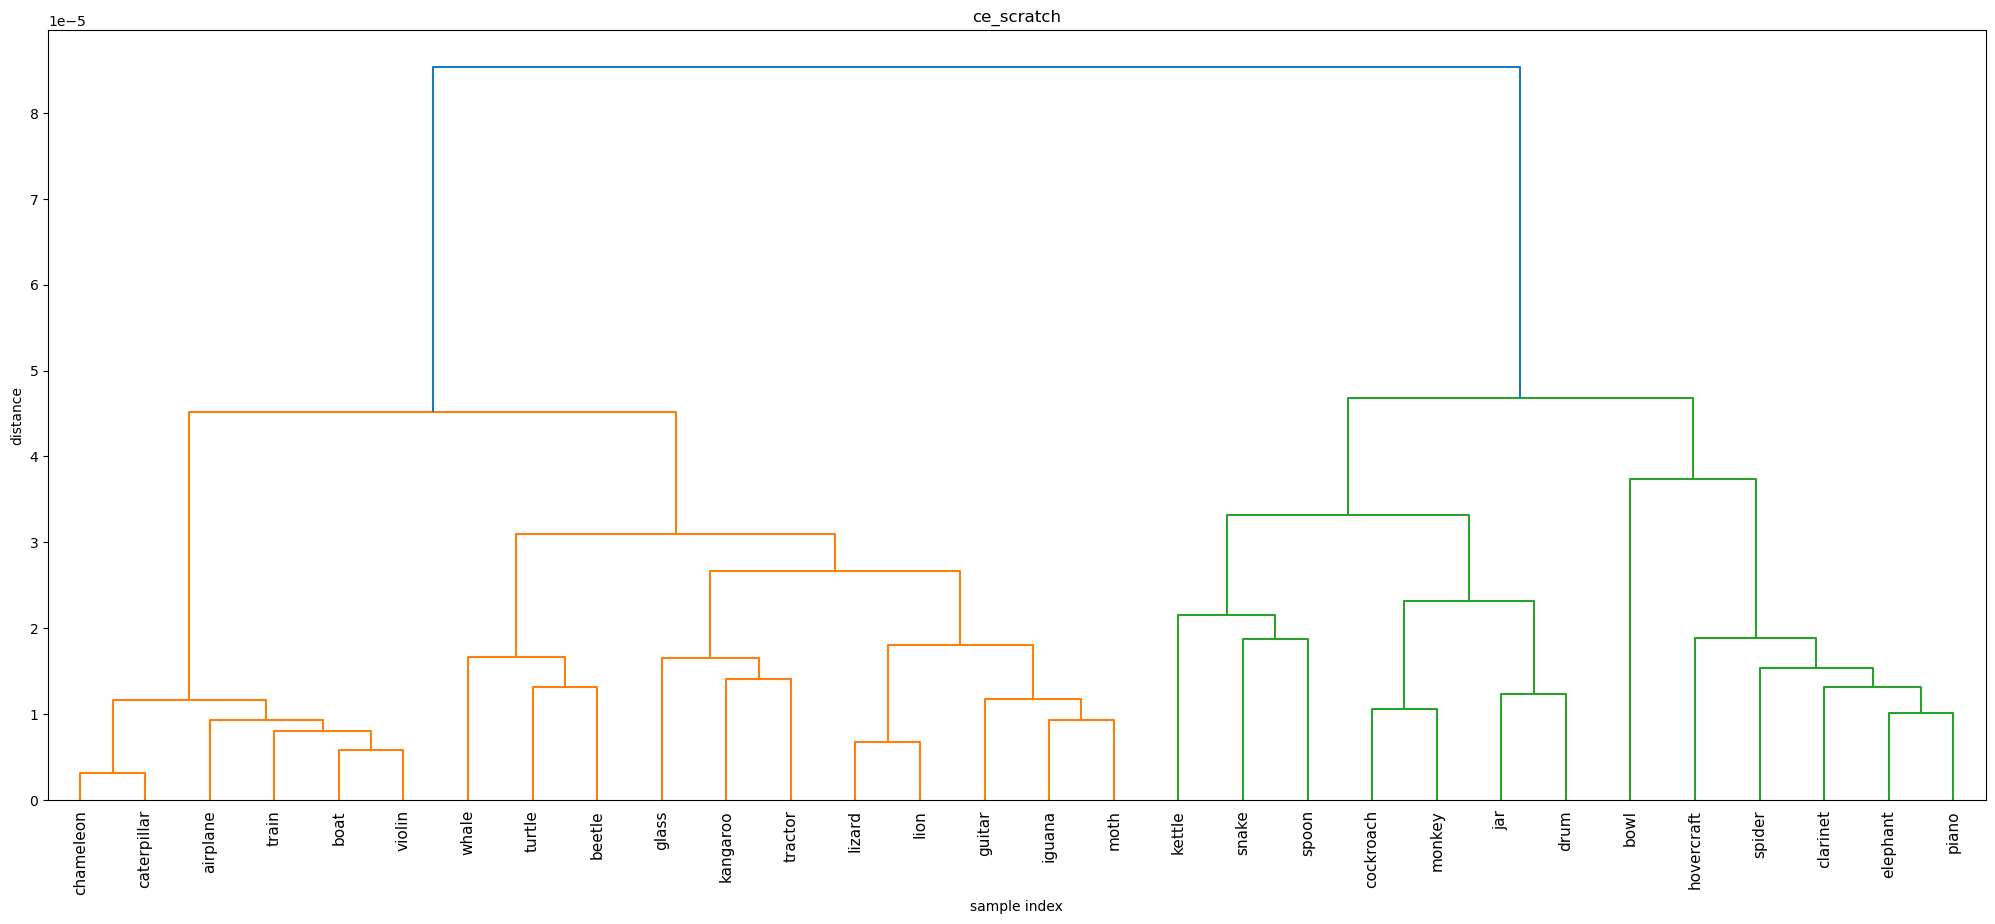

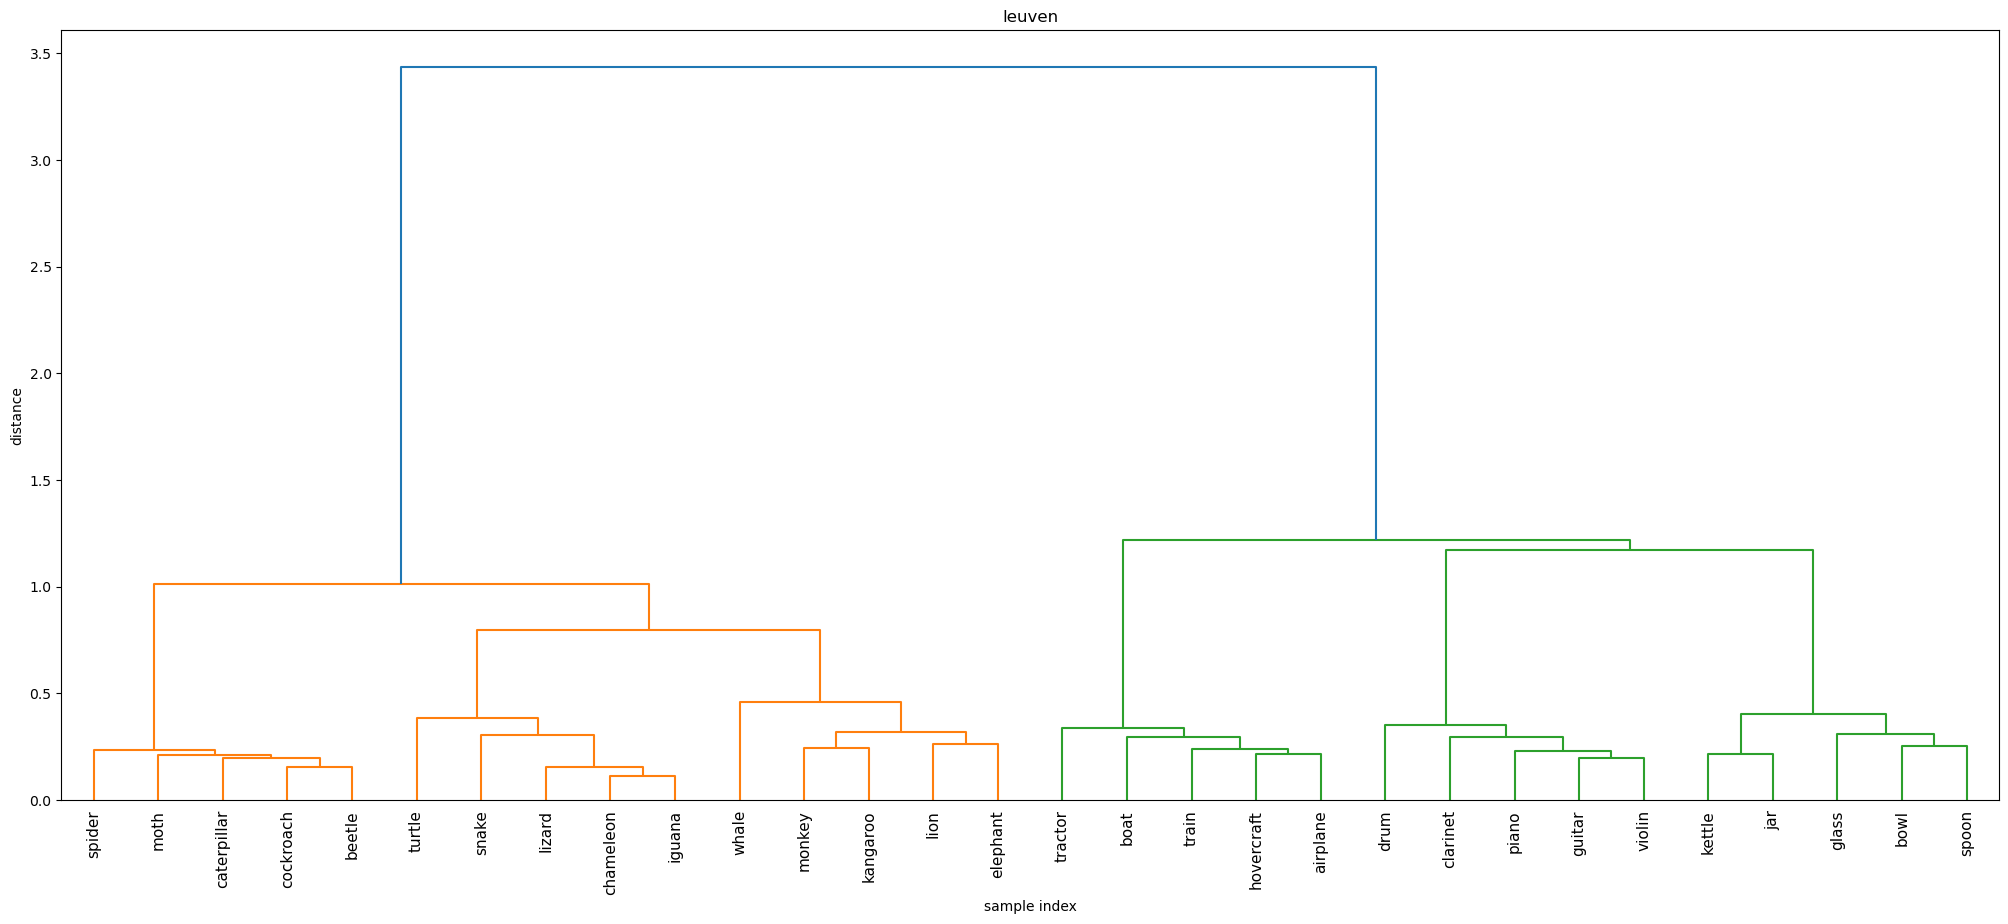

In [34]:
dendogram_list = [(df_ce_pt_ideal, 'ce_pt_ideal'), (df_ce_pt_overfit, 'ce_pt_overfit'), (df_ce_scratch, 'ce_scratch'), (df_bce_v2_ideal, 'bce_ideal'), (df_bce_v2_overfit, 'bce_overfit'), (df_ce_scratch, 'ce_scratch'), (leuven, 'leuven')]
# dendogram_list = [((df_ce_pt_ideal, 'ce_pt_ideal'))]
for df, title in dendogram_list:
    create_and_save_dendogram(df, title)

## rsa

In [ ]:
ground_truth_embeddings = pd.read_csv('../../../data/leuven_bce.csv', index_col=0)
# calculate the distance matrix with cosine distance

distance_matrix_ground_truth = pdist(ground_truth_embeddings, metric='cosine')
distance_matrix_baseline_ce = pdist(basline_ce_embeddings, metric='cosine')
distance_matrix_bce = pdist(bce_embeddings, metric='cosine')
distance_matrix_mse = pdist(mse_embeddings, metric='cosine')

# calculate how much of ground truth embeddings variance can be explained by the baseline_ce_embeddings, bce_embeddings and mse_embeddings
# by calculating the pearson correlation coefficient between the distance matrices and the ground truth distance matrix
# also add the p-value to the dataframe
# store the results in a dataframe
correlation_coefficients = pd.DataFrame(columns=['correlation_coefficient', 'p_value'])
correlation_coefficients['correlation_coefficient'] = [pearsonr(distance_matrix_ground_truth, distance_matrix_baseline_ce)[0], pearsonr(distance_matrix_ground_truth, distance_matrix_bce)[0], pearsonr(distance_matrix_ground_truth, distance_matrix_mse)[0]]
correlation_coefficients['p_value'] = [pearsonr(distance_matrix_ground_truth, distance_matrix_baseline_ce)[1], pearsonr(distance_matrix_ground_truth, distance_matrix_bce)[1], pearsonr(distance_matrix_ground_truth, distance_matrix_mse)[1]]
correlation_coefficients.index = ['baseline_ce', 'bce', 'mse']
correlation_coefficients

,correlation_coefficient,p_value
baseline_ce,-0.031632,0.055849
bce,-0.012175,0.461813
mse,-0.036270,0.028327


In [ ]:
ground_truth_embeddings = pd.read_csv('../../../data/leuven_mds_scaled.csv', index_col=0)
# calculate the distance matrix with cosine distance

distance_matrix_ground_truth = pdist(ground_truth_embeddings.T, metric='cosine')
distance_matrix_baseline_ce = pdist(basline_ce_embeddings, metric='cosine')
distance_matrix_bce = pdist(bce_embeddings, metric='cosine')
distance_matrix_mse = pdist(mse_embeddings, metric='cosine')

# calculate how much of ground truth embeddings variance can be explained by the baseline_ce_embeddings, bce_embeddings and mse_embeddings
# by calculating the pearson correlation coefficient between the distance matrices and the ground truth distance matrix
# also add the p-value to the dataframe
# store the results in a dataframe
correlation_coefficients = pd.DataFrame(columns=['correlation_coefficient', 'p_value'])
correlation_coefficients['correlation_coefficient'] = [pearsonr(distance_matrix_ground_truth, distance_matrix_baseline_ce)[0], pearsonr(distance_matrix_ground_truth, distance_matrix_bce)[0], pearsonr(distance_matrix_ground_truth, distance_matrix_mse)[0]]
correlation_coefficients['p_value'] = [pearsonr(distance_matrix_ground_truth, distance_matrix_baseline_ce)[1], pearsonr(distance_matrix_ground_truth, distance_matrix_bce)[1], pearsonr(distance_matrix_ground_truth, distance_matrix_mse)[1]]
correlation_coefficients.index = ['baseline_ce', 'bce', 'mse']
correlation_coefficients

,correlation_coefficient,p_value
baseline_ce,-0.058227,0.000428
bce,-0.012177,0.461752
mse,-0.079245,0.000002


In [ ]:
# do mds to 6d
baseline_embeddings_mds = mds.fit_transform(baseline_embeddings)
baseline_embeddings_mds = baseline_embeddings_mds[:, :6]

NameError: name 'mds' is not defined

# data aug results

In [35]:
# baseline_ce_performance = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/baseline_ce_performance.csv', index_col=0) 
# bce_performance = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/bce_performance.csv', index_col=0)
# mse_performance = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/mse_performance.csv', index_col=0)

In [3]:
human_triplets = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/mturk_results_processed.csv')
basline_ce = pd.read_csv('../../../data/post_cogsci_data_aug/model_activations_pre_final/baseline_ce_scratch.csv', index_col=0)
bce = pd.read_csv('../../../data/post_cogsci_data_aug/model_activations_pre_final/bce_pt.csv', index_col=0)
# mse = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/pre-final-layer-embeddings/mse_embeddings_each_class.csv', index_col=0)
leuven = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/pre-final-layer-embeddings/ground_truth_leuven_norms.csv', index_col=0)


baseline_ce_performance = model_prediction_on_triplets(human_triplets, basline_ce)
bce_performance = model_prediction_on_triplets(human_triplets, bce)
# mse_performance = model_prediction_on_triplets(human_triplets, mse)
leuven_performance = model_prediction_on_triplets(human_triplets, leuven)

/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['winner'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['correct'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:140: SettingWithCopyWarning: 
A value is trying to b

In [5]:
#chose columns triplet_category and correct, groupby triplet_category and get mean 'correct' for each triplet_category

baseline_cat_accuracy = baseline_ce_performance.groupby('triplet_category')['correct'].mean()
bce_cat_accuracy = bce_performance.groupby('triplet_category')['correct'].mean()
# mse_cat_accuracy = mse_performance.groupby('triplet_category')['correct'].mean()
leuven_cat_accuracy = leuven_performance.groupby('triplet_category')['correct'].mean()
human_cat_accuracy = human_triplets.groupby('triplet_category')['accuracy'].mean()
# norms_grouth_truth = human_triplets.groupby('triplet_category')['norms'].mean()

# put the accuracies in a dataframe
cat_accuracy = pd.DataFrame({'baseline_ce': baseline_cat_accuracy, 'bce': bce_cat_accuracy,'leuven': leuven_cat_accuracy, 'inter_rater': human_cat_accuracy})

# make a new row and add the mean accuracy of all the columns
cat_accuracy.loc['mean'] = cat_accuracy.mean()


In [6]:
# replace cat_0 with 'CC'
# replace cat_1 with 'CD'
# replace cat_2 with 'CO'
# replace cat_3 with 'DD
# replace cat_4 with 'DO'

cat_accuracy.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']

# add a new column called 'note' and add the following text to each row:
# cc - both from the same category as the head
# cd - one from the same category and one from a different category in the same domain
# co - one from the same category and one from a different domain all together
# dd - both from a different category in the same domain
# do - one from a different category in the same domain and one from a different domain all together
cat_accuracy['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']




cat_accuracy


,baseline_ce,bce,leuven,inter_rater,note
CC,0.600000,0.533333,0.700000,0.726300,both from the same category as the head
CD,0.400000,0.500000,1.000000,0.906606,one from the same category and one from a diff...
CO,0.400000,0.633333,1.000000,0.976819,one from the same category and one from a diff...
DD,0.583333,0.483333,0.716667,0.742177,both from a different category in the same domain
DO,0.300000,0.700000,0.966667,0.890609,one from a different category in the same doma...
mean,0.456667,0.570000,0.876667,0.848502,


# alexnet after hyperparameter search

In [3]:
human_triplets = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/mturk_results_processed.csv')
ce_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_ce_scratch.csv', index_col=0)
ce_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_ce_pt.csv', index_col=0)
bce_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_bce_scratch.csv', index_col=0)
bce_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_bce_pt.csv', index_col=0)
hybrid_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_hybrid_scratch.csv', index_col=0)
hybrid_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final/alexnet_hybrid_pt.csv', index_col=0)
leuven = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/pre-final-layer-embeddings/ground_truth_leuven_norms.csv', index_col=0)


ce_scratch_performance = model_prediction_on_triplets(human_triplets, ce_scratch)
ce_pt_performance = model_prediction_on_triplets(human_triplets, ce_pt)
bce_scratch_performance = model_prediction_on_triplets(human_triplets, bce_scratch)
bce_pt_performance = model_prediction_on_triplets(human_triplets, bce_pt)
hybrid_scratch_performance = model_prediction_on_triplets(human_triplets, hybrid_scratch)
hybrid_pt_performance = model_prediction_on_triplets(human_triplets, hybrid_pt)
# mse_performance = model_prediction_on_triplets(human_triplets, mse)
leuven_performance = model_prediction_on_triplets(human_triplets, leuven)

/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['winner'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['correct'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:143: SettingWithCopyWarning: 
A value is trying to b

In [4]:
#chose columns triplet_category and correct, groupby triplet_category and get mean 'correct' for each triplet_category

ce_scratch_cat_accuracy = ce_scratch_performance.groupby('triplet_category')['correct'].mean()
ce_pt_cat_accuracy = ce_pt_performance.groupby('triplet_category')['correct'].mean()
bce_scratch_cat_accuracy = bce_scratch_performance.groupby('triplet_category')['correct'].mean()
bce_pt_cat_accuracy = bce_pt_performance.groupby('triplet_category')['correct'].mean()
hybrid_scratch_cat_accuracy = hybrid_scratch_performance.groupby('triplet_category')['correct'].mean()
hybrid_pt_cat_accuracy = hybrid_pt_performance.groupby('triplet_category')['correct'].mean()
# mse_cat_accuracy = mse_performance.groupby('triplet_category')['correct'].mean()
leuven_cat_accuracy = leuven_performance.groupby('triplet_category')['correct'].mean()
human_cat_accuracy = human_triplets.groupby('triplet_category')['accuracy'].mean()
# norms_grouth_truth = human_triplets.groupby('triplet_category')['norms'].mean()

# put the accuracies in a dataframe based on scratch or pt. Make two dataframes, one for scratch and one for pt
cat_accuracy_scratch = pd.DataFrame({'ce_scratch': ce_scratch_cat_accuracy, 'bce_scratch': bce_scratch_cat_accuracy,'hybrid_scratch': hybrid_scratch_cat_accuracy, 'leuven': leuven_cat_accuracy, 'inter_rater': human_cat_accuracy})
cat_accuracy_pt = pd.DataFrame({'ce_pt': ce_pt_cat_accuracy, 'bce_pt': bce_pt_cat_accuracy,'hybrid_pt': hybrid_pt_cat_accuracy, 'leuven': leuven_cat_accuracy, 'inter_rater': human_cat_accuracy})


In [8]:
cat_accuracy_scratch.loc['mean'] = cat_accuracy_scratch.mean()
cat_accuracy_scratch.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']
cat_accuracy_scratch['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']

cat_accuracy_scratch

,ce_scratch,bce_scratch,hybrid_scratch,leuven,inter_rater,note
CC,0.566667,0.633333,0.400000,0.700000,0.726300,both from the same category as the head
CD,0.533333,0.600000,0.600000,1.000000,0.906606,one from the same category and one from a diff...
CO,0.633333,0.666667,0.533333,1.000000,0.976819,one from the same category and one from a diff...
DD,0.483333,0.483333,0.416667,0.716667,0.742177,both from a different category in the same domain
DO,0.400000,0.400000,0.433333,0.966667,0.890609,one from a different category in the same doma...
mean,0.523333,0.556667,0.476667,0.876667,0.848502,


In [9]:
cat_accuracy_pt.loc['mean'] = cat_accuracy_pt.mean()
cat_accuracy_pt.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']
cat_accuracy_pt['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']
cat_accuracy_pt

,ce_pt,bce_pt,hybrid_pt,leuven,inter_rater,note
CC,0.433333,0.533333,0.566667,0.700000,0.726300,both from the same category as the head
CD,0.666667,0.633333,0.633333,1.000000,0.906606,one from the same category and one from a diff...
CO,0.433333,0.633333,0.633333,1.000000,0.976819,one from the same category and one from a diff...
DD,0.550000,0.516667,0.450000,0.716667,0.742177,both from a different category in the same domain
DO,0.600000,0.400000,0.433333,0.966667,0.890609,one from a different category in the same doma...
mean,0.536667,0.543333,0.543333,0.876667,0.848502,


# dim reduction

In [10]:
import os
import pandas as pd
from sklearn.manifold import MDS

dir = '../../../data/alexnet_hp_tuned_all_concepts/model_activations_pre_final'
# if not os.path.exists('../../../data/alexnet_hp_tuned_all_concepts/model_activations_pre_final_dim_20'):
#     os.makedirs('../../../data/alexnet_hp_tuned_all_concepts/model_activations_pre_final_20')

# for all the files in the directory, read them, do dimensionality reduction to 20 dim and save them in the new dir
for filename in os.listdir(dir):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(dir + '/' + filename, index_col=0)
        rownames = df.index
        # find the dissimilarity matrix using cosine distance
        df = 1 - df.corr(method='pearson')
        


        df = MDS(n_components=20).fit_transform(df)
        # transpose the dataframe back
        # save the dataframe
        df = pd.DataFrame(df , index=rownames)
        df.to_csv(os.path.join('../../../data/alexnet_hp_tuned/model_activations_pre_final_20',filename))
        continue
    else:
        continue

alexnet_ce_pt.csv
alexnet_bce_pt.csv
alexnet_bce_scratch.csv
alexnet_hybrid_pt.csv
alexnet_hybrid_scratch.csv
alexnet_ce_scratch.csv


In [11]:
human_triplets = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/triplet_task/mturk_results_processed.csv')
ce_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_ce_scratch.csv', index_col=0)
ce_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_ce_pt.csv', index_col=0)
bce_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_bce_scratch.csv', index_col=0)
bce_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_bce_pt.csv', index_col=0)
hybrid_scratch = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_hybrid_scratch.csv', index_col=0)
hybrid_pt = pd.read_csv('../../../data/alexnet_hp_tuned/model_activations_pre_final_20/alexnet_hybrid_pt.csv', index_col=0)
leuven = pd.read_csv('../../../data/vss_2023_data_sent_to_tim/pre-final-layer-embeddings/ground_truth_leuven_norms.csv', index_col=0)


ce_scratch_performance = model_prediction_on_triplets(human_triplets, ce_scratch)
ce_pt_performance = model_prediction_on_triplets(human_triplets, ce_pt)
bce_scratch_performance = model_prediction_on_triplets(human_triplets, bce_scratch)
bce_pt_performance = model_prediction_on_triplets(human_triplets, bce_pt)
hybrid_scratch_performance = model_prediction_on_triplets(human_triplets, hybrid_scratch)
hybrid_pt_performance = model_prediction_on_triplets(human_triplets, hybrid_pt)
# mse_performance = model_prediction_on_triplets(human_triplets, mse)
leuven_performance = model_prediction_on_triplets(human_triplets, leuven)

/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['winner'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df['correct'] = ''
/home/siddsuresh97/Projects/vision_robustness_using_semantic_norms/src/utils/vss_helper_functions.py:143: SettingWithCopyWarning: 
A value is trying to b

In [12]:
#chose columns triplet_category and correct, groupby triplet_category and get mean 'correct' for each triplet_category

ce_scratch_cat_accuracy = ce_scratch_performance.groupby('triplet_category')['correct'].mean()
ce_pt_cat_accuracy = ce_pt_performance.groupby('triplet_category')['correct'].mean()
bce_scratch_cat_accuracy = bce_scratch_performance.groupby('triplet_category')['correct'].mean()
bce_pt_cat_accuracy = bce_pt_performance.groupby('triplet_category')['correct'].mean()
hybrid_scratch_cat_accuracy = hybrid_scratch_performance.groupby('triplet_category')['correct'].mean()
hybrid_pt_cat_accuracy = hybrid_pt_performance.groupby('triplet_category')['correct'].mean()
# mse_cat_accuracy = mse_performance.groupby('triplet_category')['correct'].mean()
leuven_cat_accuracy = leuven_performance.groupby('triplet_category')['correct'].mean()
human_cat_accuracy = human_triplets.groupby('triplet_category')['accuracy'].mean()
# norms_grouth_truth = human_triplets.groupby('triplet_category')['norms'].mean()

# put the accuracies in a dataframe based on scratch or pt. Make two dataframes, one for scratch and one for pt
cat_accuracy_scratch = pd.DataFrame({'ce_scratch': ce_scratch_cat_accuracy, 'bce_scratch': bce_scratch_cat_accuracy,'hybrid_scratch': hybrid_scratch_cat_accuracy, 'leuven': leuven_cat_accuracy, 'inter_rater': human_cat_accuracy})
cat_accuracy_pt = pd.DataFrame({'ce_pt': ce_pt_cat_accuracy, 'bce_pt': bce_pt_cat_accuracy,'hybrid_pt': hybrid_pt_cat_accuracy, 'leuven': leuven_cat_accuracy, 'inter_rater': human_cat_accuracy})


In [13]:
cat_accuracy_scratch.loc['mean'] = cat_accuracy_scratch.mean()
cat_accuracy_scratch.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']
cat_accuracy_scratch['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']

cat_accuracy_scratch

,ce_scratch,bce_scratch,hybrid_scratch,leuven,inter_rater,note
CC,0.633333,0.433333,0.566667,0.700000,0.726300,both from the same category as the head
CD,0.633333,0.666667,0.633333,1.000000,0.906606,one from the same category and one from a diff...
CO,0.566667,0.733333,0.700000,1.000000,0.976819,one from the same category and one from a diff...
DD,0.583333,0.650000,0.483333,0.716667,0.742177,both from a different category in the same domain
DO,0.633333,0.666667,0.600000,0.966667,0.890609,one from a different category in the same doma...
mean,0.610000,0.630000,0.596667,0.876667,0.848502,


In [14]:
cat_accuracy_pt.loc['mean'] = cat_accuracy_pt.mean()
cat_accuracy_pt.index = ['CC', 'CD', 'CO', 'DD', 'DO', 'mean']
cat_accuracy_pt['note'] = ['both from the same category as the head', 'one from the same category and one from a different category in the same domain', 'one from the same category and one from a different domain all together', 'both from a different category in the same domain', 'one from a different category in the same domain and one from a different domain all together', '']
cat_accuracy_pt

,ce_pt,bce_pt,hybrid_pt,leuven,inter_rater,note
CC,0.733333,0.600000,0.733333,0.700000,0.726300,both from the same category as the head
CD,0.633333,0.900000,0.733333,1.000000,0.906606,one from the same category and one from a diff...
CO,0.766667,1.000000,0.966667,1.000000,0.976819,one from the same category and one from a diff...
DD,0.416667,0.616667,0.716667,0.716667,0.742177,both from a different category in the same domain
DO,0.666667,0.866667,0.966667,0.966667,0.890609,one from a different category in the same doma...
mean,0.643333,0.796667,0.823333,0.876667,0.848502,
